<a href="https://colab.research.google.com/github/preetshah7/book-recommendation-system/blob/main/bookrecommendsyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Book Recommendation System
-Preet Shah

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving books.csv to books.csv


In [ ]:
df_book=pd.read_csv('books.csv', error_bad_lines = False)
df_book.columns = df_book.columns.str.strip()

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [ ]:
print(df_book.shape)

(11123, 12)


In [ ]:
print(df_book.isna().sum())

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64


In [ ]:
df_book.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


**Data Summaries**

In [ ]:
df_book.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

**Data Preprocess**

**Selecting Subset**

In [ ]:
df_subset=df_book[df_book['authors'].isin(['J.K. Rowling','Stephen King'])]

In [ ]:
df_subset.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic
613,2002,Harry Potter Schoolbooks Box Set: Two Classic ...,J.K. Rowling,4.40,043932162X,9780439321624,eng,240,11515,139,11/1/2001,Arthur A. Levine
615,2005,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,0747584664,9780747584667,eng,768,1213,78,6/23/2006,Bloomsbury Publishing
988,3357,Harry Potter Y La Piedra Filosofal (Harry Pott...,J.K. Rowling,4.47,0613359607,9780613359603,spa,254,142,12,3/6/2001,Turtleback Books


In [ ]:
df_subset.groupby('authors').count()

,bookID,title,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
authors,,,,,,,,,,,
J.K. Rowling,11,11,11,11,11,11,11,11,11,11,11
Stephen King,40,40,40,40,40,40,40,40,40,40,40


In [ ]:
df_subset=df_book[df_book['authors'].str.contains('.*J.K. Rowling.*', regex=True)==True]

In [ ]:
df_subset.groupby('authors').count()

,bookID,title,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
authors,,,,,,,,,,,
J.K. Rowling,11,11,11,11,11,11,11,11,11,11,11
J.K. Rowling/Gemma Rovira Ortega,1,1,1,1,1,1,1,1,1,1,1
J.K. Rowling/J.K.羅琳/彭倩文,1,1,1,1,1,1,1,1,1,1,1
J.K. Rowling/J.K.羅琳/皇冠編譯組/張定綺/彭倩文/趙丕慧/林靜華,1,1,1,1,1,1,1,1,1,1,1
J.K. Rowling/Mary GrandPré,6,6,6,6,6,6,6,6,6,6,6
J.K. Rowling/Peter Needham,2,2,2,2,2,2,2,2,2,2,2
J.K. Rowling/Rufus Beck,1,1,1,1,1,1,1,1,1,1,1
J.K. Rowling/Sevin Okyay,1,1,1,1,1,1,1,1,1,1,1
Newt Scamander/J.K. Rowling,1,1,1,1,1,1,1,1,1,1,1


**Transforming Values**


1. Publication year
2. Grouping by number of pages
3. First Author

In [ ]:

df_book['publication_year']=df_book['publication_date'].str[-4:]

In [ ]:

df_book['num_pages_grp']= np.select(
    [
        df_book['num_pages'].between(0, 249, inclusive=True), 
        df_book['num_pages'].between(250, 499, inclusive=True),
        df_book['num_pages'].between(500, 749, inclusive=True),
        df_book['num_pages'].between(750, 999, inclusive=True),
        df_book['num_pages']>=1000    
    ], 
    [
        '<250', 
        '250-499',
        '500-749',
        '750-999',
        '>=1000'
    ], 
    default='Unknown'
)

In [ ]:

df_book['first_author']=df_book['authors'].str.extract(r'(.*?)\/')
df_book['first_author']=df_book['first_author'].fillna(df_book['authors'])

In [ ]:
df_book.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year,num_pages_grp,first_author
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006,500-749,J.K. Rowling
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004,750-999,J.K. Rowling
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,2003,250-499,J.K. Rowling
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,2004,250-499,J.K. Rowling
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,2004,>=1000,J.K. Rowling


Type Markdown and LaTeX:  𝛼2

In [ ]:
df_book.groupby('num_pages_grp').count()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year,first_author
num_pages_grp,,,,,,,,,,,,,,
250-499,5106,5106,5106,5106,5106,5106,5106,5106,5106,5106,5106,5106,5106,5106
500-749,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185
750-999,343,343,343,343,343,343,343,343,343,343,343,343,343,343
<250,4272,4272,4272,4272,4272,4272,4272,4272,4272,4272,4272,4272,4272,4272
>=1000,217,217,217,217,217,217,217,217,217,217,217,217,217,217


**Aggregation & Sorting**


In [ ]:
# Group by column 'authors'
# Kita dapat menerapkan fungsi agregasi yang berbeda untuk setiap kolom
most_books = df_book.groupby('authors').agg({'title':'count','average_rating':np.mean,'text_reviews_count':'sum'})
# Menyortir di Pandas juga mudah
# Dapatkan 10 data teratas
most_books = most_books.sort_values('title', ascending=False).head(10)

In [ ]:
most_books

,title,average_rating,text_reviews_count
authors,,,
Stephen King,40,3.973500,55897
P.G. Wodehouse,40,4.147250,5535
Rumiko Takahashi,39,4.186667,588
Orson Scott Card,35,3.779143,24843
Agatha Christie,33,3.989091,53424
Piers Anthony,30,3.716667,1054
Mercedes Lackey,29,4.039310,6655
Sandra Brown,29,3.742069,4826
Dick Francis,28,3.962143,2865





**Data Visualization**

1D Plotting


Histogram

<Figure size 1440x1440 with 0 Axes>

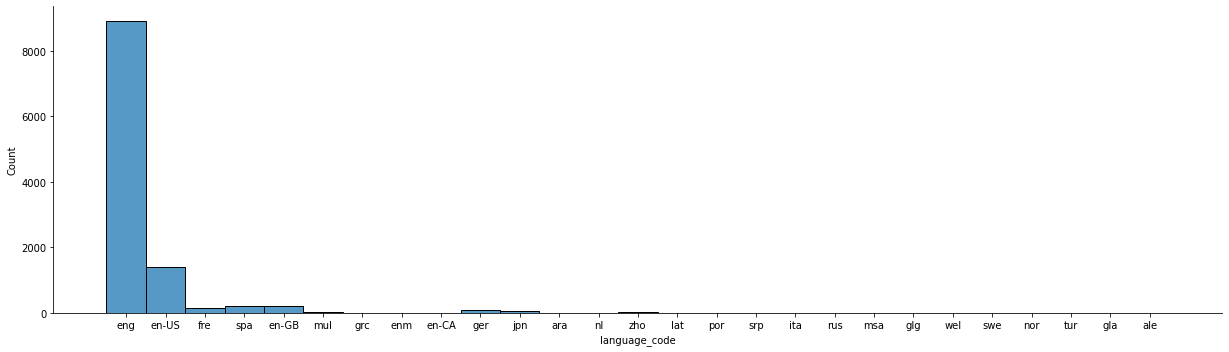

In [ ]:
plt.figure(figsize=(20,20))
g =sns.displot(df_book, x="language_code")
g.fig.set_figwidth(20)

KDE

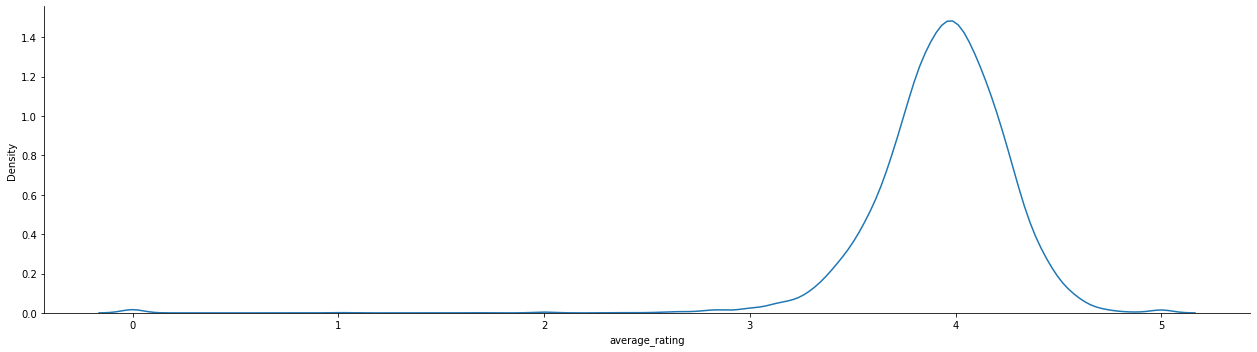

In [ ]:
g=sns.displot(df_book, x="average_rating", kind="kde")
g.fig.set_figwidth(20)

Barplot

In [ ]:
#sns.set_context('talk')
most_books = df_book.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors');
plt.figure(figsize=(15,10));
ax = sns.barplot(most_books['title'], most_books.index, palette='icefire_r');
ax.set_title("Top 10 authors with most books");
ax.set_xlabel("Total number of books");
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k');

**2D Plotting**

Stack bar

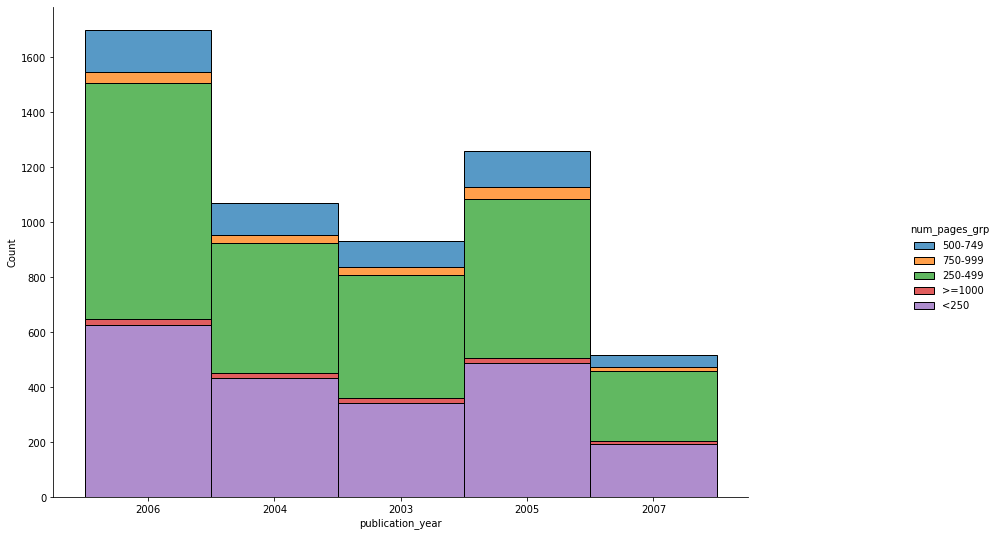

In [ ]:
g=sns.displot(df_book[df_book['publication_year'].between('2003','2007')], x="publication_year", hue="num_pages_grp", multiple="stack")
g.fig.set_figwidth(15)
g.fig.set_figheight(8)

Scatter Plot

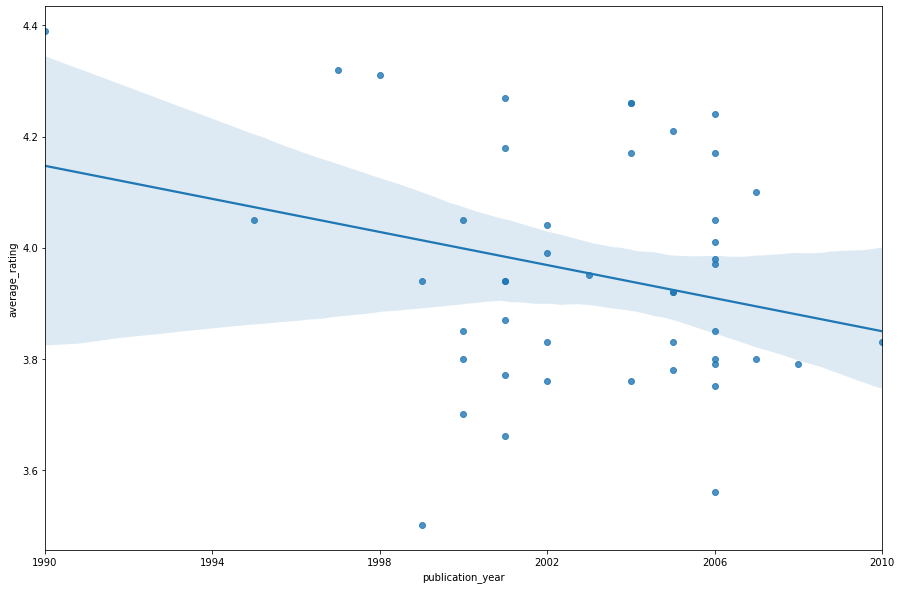

In [ ]:
df_subset = df_book[df_book['authors'].str.contains('.*Agatha Christie.*', regex=True)==True]
df_subset = df_subset[df_subset['publication_year'].between('1990','2010')]
df_subset['publication_year'] = df_subset['publication_year'].astype(int)
fig, ax = plt.subplots(figsize=(15,10))
sns.regplot(ax=ax,data=df_subset, x="publication_year", y="average_rating")
ax.set_xticks(list(range(1990,2011,4)));



Heatmap

In [ ]:
most_books_publisher = df_book.groupby('publisher')['title'].count().reset_index().sort_values('title', ascending=False).head(10);
df_subset = df_book[df_book['publisher'].isin(most_books_publisher.reset_index()['publisher'].tolist())]
df_subset = df_subset[df_subset['publication_year'].isin(['2003','2004','2005','2006','2007'])]
df_subset = df_subset.groupby(["publisher","publication_year"]).agg({"average_rating":np.mean}).reset_index()
df_subset = df_subset.pivot("publisher", "publication_year", "average_rating")
df_subset

publication_year,2003,2004,2005,2006,2007
publisher,,,,,
Ballantine Books,4.007143,3.867500,3.938333,3.878519,3.746667
Bantam,3.788333,3.877143,3.998571,3.935000,3.855000
Harper Perennial,3.678571,3.976667,3.945556,3.930833,3.754000
HarperCollins,4.285000,4.063333,3.947778,4.086000,4.103636
Mariner Books,3.869000,3.838571,3.847692,3.835000,3.638000
Penguin Books,3.917143,3.941818,3.917143,3.952581,3.862500
Penguin Classics,3.931250,3.957333,3.948462,3.982609,4.023333
Pocket Books,3.932000,3.898889,4.023333,3.893333,3.880000
VIZ Media LLC,4.050000,4.124000,4.376250,4.294118,4.162083


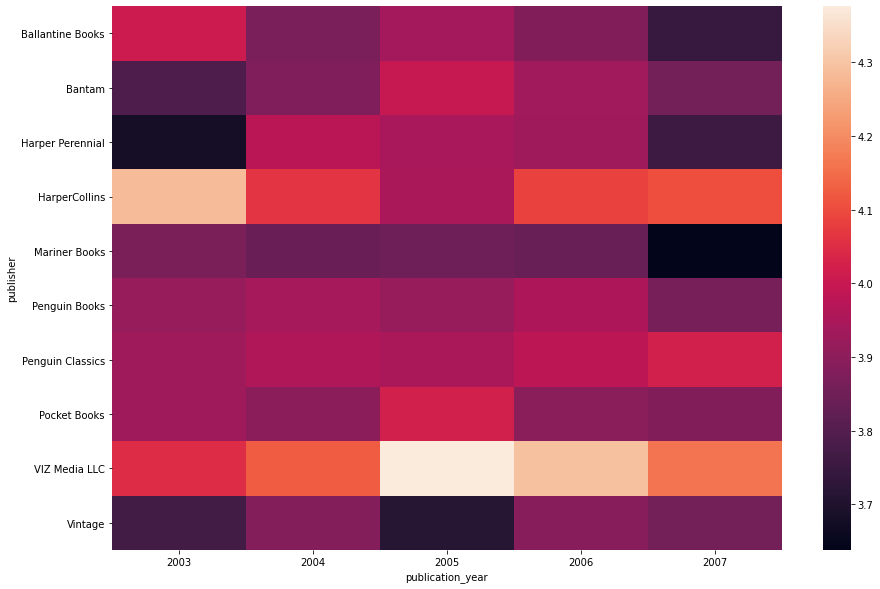

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
g = sns.heatmap(ax=ax,data=df_subset)

Violin Plot

In [ ]:
most_books = df_book.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors');
df_most_books = df_book[df_book['authors'].isin(most_books.index.tolist())]

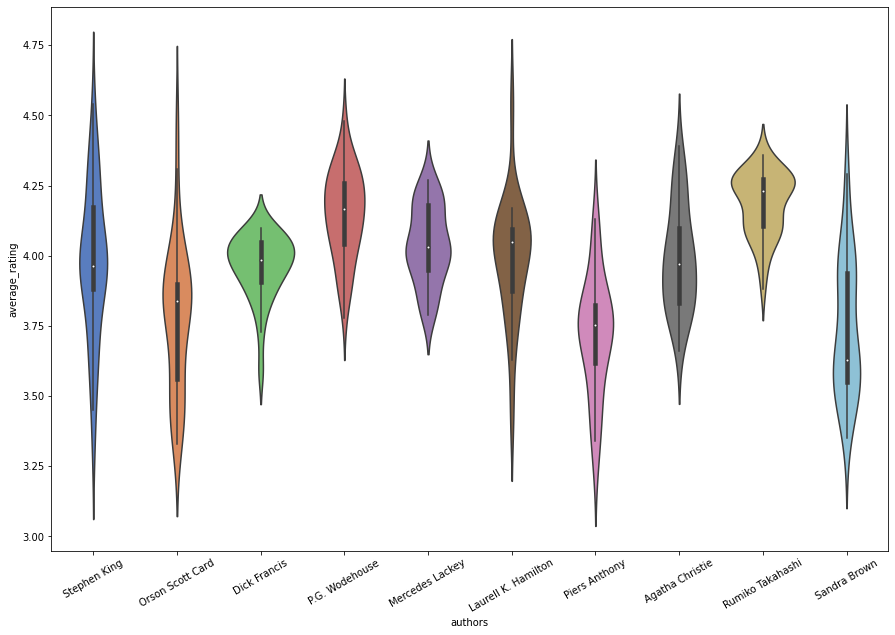

In [ ]:
plt.figure(figsize=(15,10));
ax = sns.violinplot(x="authors", y="average_rating",
                    data=df_most_books, palette="muted")
ax.set_xticklabels(ax.get_xticklabels(),rotation=30);

Variation

Wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS
text=df_most_books['title'].tolist()
def plot_word_cloud(df_cloud):
    stopwords = set(STOPWORDS)
    comment_words = ''
    for val in df_cloud['title']:
      
        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

        wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

    #plot the WordCloud image                       
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

In [ ]:
# iterate through the csv file
df_cloud=df_most_books[df_most_books['authors']=='Stephen King']
plot_word_cloud(df_cloud)

In [ ]:
df_cloud=df_most_books[df_most_books['authors']=='Agatha Christie']
plot_word_cloud(df_cloud)